In [61]:
import keras
keras.__version__

import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [62]:
import pandas as pd
import numpy as np

In [63]:
df=pd.read_csv("../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [64]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [33]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
# train_labels and test_labels are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive"

# df['sentiment']=np.where(df['sentiment']=='positive', 1, 0)

In [34]:
df['review'][3000]

'I bought a set of 4 DVDs for 10 bucks at my local Suncoast, which contained this movie and three other trashy horror flicks (including its sequel "Witchcraft XI"). So basically I paid the rock bottom price of $2.50 for this movie, if you do the math. I can\'t exactly say I was ripped off. I have a thing for trashy horror movies, but this is the kind of trash that gives trash a bad name. The budget couldn\'t be over $1,000 (though it appears as if they spent a total of $1.50). I know it\'s a low-budget film, but that\'s no excuse for totally uninspired camerawork. The film "Blood Cult," though not very good, was made for an extremely low budget and still had fairly good camerawork and acting. The acting in this movie is the definition of "effortless," especially from that muscular guy with the Texas accent. Everyone is pretty much reading their lines off the page. You can take that figuratively or literally. I wouldn\'t be surprised if the script was off-camera as they were performing.

In [65]:
stopwords_special = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


In [66]:
#to remove stop words from column: review 
import string
def remove_stop_words_punct(df, c):
    sentences = []
    output_sentences=[]
    
    for row in df[c]:
        sentence = row
        for word in stopwords_special:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
        sentences.append(sentence)
        
    for s in sentences:
        
#         s.translate({ord(c): " " for c in ':\'-,{!'})
        element = s.replace('<br />','')
        element = element.replace('"','')
        element = element.replace(')','')
        element = element.replace('(','')
        element = element.replace('{','')
        element = element.replace('}','')
        element = element.replace('\'','')
        element = element.replace('$','')
        element = element.replace('-','')
        element = element.replace('!','')
        element = element.replace(':','')
        element = element.replace(',','')
        element = element.replace('.','')                          
        output_sentences.append(' '.join( [w for w in element.split() if len(w)>1] ))

    return output_sentences

In [67]:
sentences=remove_stop_words_punct(df, 'review')

In [38]:
#Looking good after the above transformation

sentences[3000]

'bought set DVDs 10 bucks local Suncoast contained movie three trashy horror flicks including sequel Witchcraft XI So basically paid rock bottom price 250 movie math cant exactly say ripped off thing trashy horror movies kind trash gives trash bad name The budget couldnt 1000 though appears spent total 150 know lowbudget film no excuse totally uninspired camerawork The film Blood Cult though not good made extremely low budget still fairly good camerawork acting The acting movie definition effortless especially muscular guy Texas accent Everyone pretty much reading lines off page You can take figuratively literally wouldnt surprised script offcamera performing said Ive never seen bad English actor This movie quite bad ones And though English movies arent always good always seem least level sophistication dont see Englishman Englishwoman volunteer homevideostyle schlock flick like this Did Merchant Ivory put hold casting calls? Usually think people hard directors actors Even worst movies

In [68]:
labels=df['sentiment'].values.tolist()

In [69]:
#Splitting 80% of the dataset into a training set and 20% as validation set

training_portion=0.80
# testing portion=0.10
train_size = int(len(sentences)*training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

test_sentences = sentences[train_size:]
test_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(test_sentences))
print(len(test_labels))

40000
40000
40000
10000
10000


In [70]:


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

oov_tok = "<OOV>"
vocab_size=10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index


In [43]:
len(word_index)

188019

In [71]:
max_length = 20 #average of max_len and min_len
trunc_type = 'post'
padding_type = 'post'

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type,  padding=padding_type)

In [45]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type,  padding=padding_type)


In [73]:
# y_train=np.array(train_labels)

# y_test=np.array(test_labels)

label_tokenizer = Tokenizer()




In [74]:
label_tokenizer

In [75]:
label_tokenizer.fit_on_texts(labels)

In [ ]:
# label_tokenizer.texts_to_sequences(train_labels)

In [76]:
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
test_label_seq = np.array(label_tokenizer.texts_to_sequences(test_labels))


In [ ]:
# training_label_seq

In [ ]:
# len(train_padded), len(training_label_seq), len(test_padded), len(test_label_seq)

In [77]:
partial_x_train = train_padded[:8000]
x_validation = train_padded[8000:]


partial_y_train = training_label_seq[:8000]
y_validation = training_label_seq[8000:]


In [51]:
# Let's try 1 hidden layer with 32 hidden units with relu activation

from keras import models
from keras.layers import Embedding
from keras import layers
from keras.layers import Flatten, Dense
from keras.models import Sequential
vocab_size=10000
embedding_dim = 64

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(layers.Dense(1, activation='sigmoid'))# We add the classifier on top




# model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#              tf.keras.layers.Dense(128, activation='relu'),
#              tf.keras.layers.Dense(128, activation='relu'),
#              tf.keras.layers.Dense(128, activation='relu'),
#              tf.keras.layers.Dense(1, activation='sigmoid')
# ])


In [52]:
# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 16)            160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 321       
Total params: 160,321
Trainable params: 160,321
Non-trainable params: 0
_________________________________________________________________


In [53]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [54]:
#A single hidden layer clearly is not sufficient to learn patterns from the training data and therefore performs poorly on the validation data also.
#Remember that vicab_size=100000 words are included 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    callbacks=[callback],
                    validation_data=(x_validation, y_validation))



# Received an InvalidArgumentError first: InvalidArgumentError:  Received a label value of 1 which is outside the valid range of [0, 1).
# Range [0, 1) means every number between 0 and 1, excluding 1. So 1 is not a value in the range [0, 1).



Epoch 1/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6125 - accuracy: 0.4389 - val_loss: 0.5082 - val_accuracy: 0.4994
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 0.3780 - accuracy: 0.5004 - val_loss: 0.2357 - val_accuracy: 0.4997
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 0.0568 - accuracy: 0.5004 - val_loss: -0.1200 - val_accuracy: 0.4997
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: -0.3269 - accuracy: 0.5004 - val_loss: -0.5228 - val_accuracy: 0.4997
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: -0.7470 - accuracy: 0.5004 - val_loss: -0.9546 - val_accuracy: 0.4997
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: -1.1948 - accuracy: 0.5004 - val_loss: -1.4179 - val_accuracy: 0.4997
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: -1.6773 - accuracy: 0.5004 - val_loss: -1.9187 - val_accuracy: 0.4997
Epoc

In [55]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

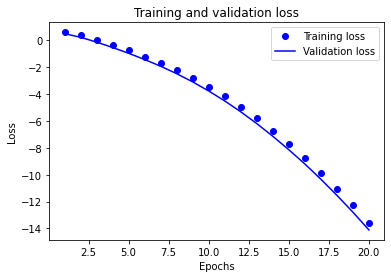

In [56]:
#Let's plot Training Vs. Validation Loss

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

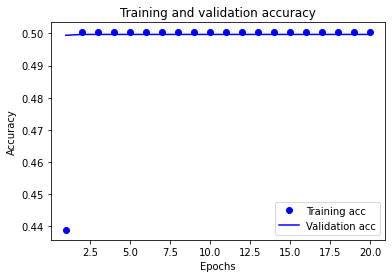

In [57]:
#Let's plot Training Vs. Validation Accuracy

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
